In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading of the dataset

In [4]:
Features = pd.read_csv(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\Completed\MLR\ToyotaCorolla - MLR.csv")

In [5]:
Features.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# Exploratory data analysis (EDA) 

In [7]:
Features.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

## While obeserving the above output there is no null values

# Visuvalization for understanding of the data

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 700x800 with 0 Axes>

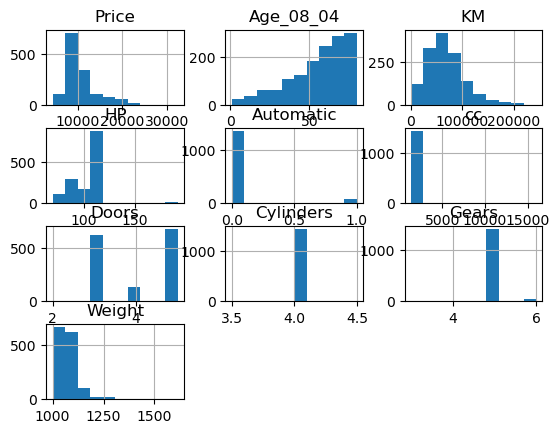

In [10]:
# Histplot
plt.figure(figsize=(7,8))
Features.hist()

<Axes: >

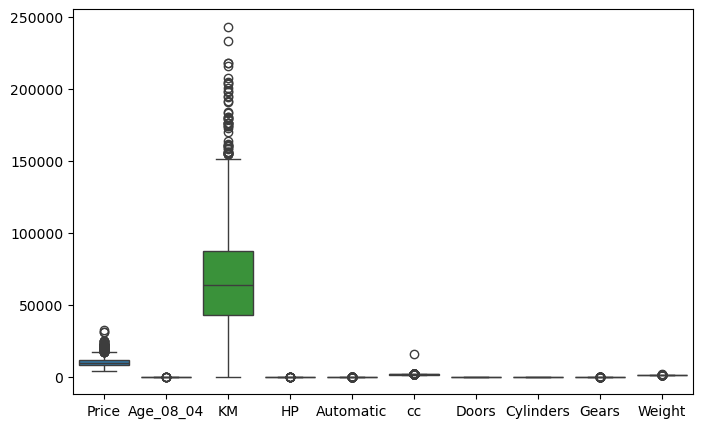

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(Features)

In [12]:
# Convert 'Fuel_Type' column to numerical representation using one-hot encoding
df = pd.get_dummies(Features, columns=['Fuel_Type'])

In [13]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                     Price  Age_08_04        KM        HP  Automatic  \
Price             1.000000  -0.876590 -0.569960  0.314990   0.033081   
Age_08_04        -0.876590   1.000000  0.505672 -0.156622   0.031717   
KM               -0.569960   0.505672  1.000000 -0.333538  -0.081854   
HP                0.314990  -0.156622 -0.333538  1.000000   0.013144   
Automatic         0.033081   0.031717 -0.081854  0.013144   1.000000   
cc                0.126389  -0.098084  0.102683  0.035856   0.066740   
Doors             0.185326  -0.148359 -0.036197  0.092424  -0.027654   
Cylinders              NaN        NaN       NaN       NaN        NaN   
Gears             0.063104  -0.005364  0.015023  0.209477  -0.098555   
Weight            0.581198  -0.470253 -0.028598  0.089614   0.057249   
Fuel_Type_CNG    -0.039536   0.002389  0.144016  0.062109   0.001486   
Fuel_Type_Diesel  0.054084  -0.097740  0.403060 -0.533453  -0.084490   
Fuel_Type_Petrol -0.038516   0.092611 -0.433160  0.489110   0.08

###  Heatmap of the correlation matrix

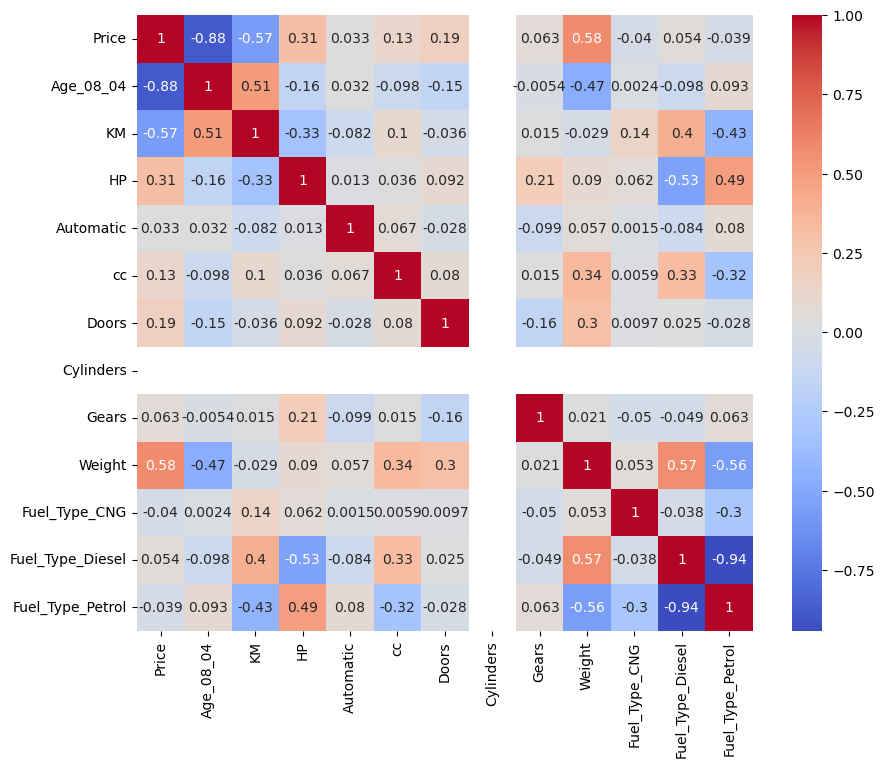

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

## Splitting the dataset

In [17]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score,accuracy_score,f1_score,recall_score,precision_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [21]:
# Model 1
X_train_model1 = X_train[['Age_08_04', 'KM', 'HP', 'cc','Doors', 'Weight']]

In [22]:
model1 = LinearRegression()
model1.fit(X_train_model1, y_train)

LinearRegression()

In [23]:
# Model 2
X_train_model2 = X_train[['Age_08_04', 'cc','KM','HP', 'Doors','Weight']]

In [24]:
model2 = LinearRegression()
model2.fit(X_train_model2, y_train)

LinearRegression()

In [25]:
# Model 3
X_train_model3 = X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Doors','Weight']]

In [26]:
model3 = LinearRegression()
model3.fit(X_train_model3, y_train)

LinearRegression()

## Predicted values

In [28]:
y_pred1 = model1.predict(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])
y_pred2 = model2.predict(X_test[['Age_08_04', 'cc','KM','HP', 'Doors','Weight']])
y_pred3 = model3.predict(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])

## Calculate the accuracy score

In [30]:
# Calculate R-squared for each model
A1= r2_score(y_test, y_pred1)
A2 = r2_score(y_test, y_pred2)
A3 = r2_score(y_test, y_pred3)
A1,A2,A3

(0.850613592236715, 0.8506135922367148, 0.850613592236715)

# Lasso and Ridge Regressio

### Lasso Regression

In [33]:
Lass =Lasso(alpha=0.1)

In [34]:
Lass.fit(X_train,y_train)

Lasso(alpha=0.1)

In [35]:
Y_predl = Lass.predict(X_test)

In [36]:
r2_score(y_test,Y_predl)

0.8348978573514272

### Ridge Regression

In [38]:
reg = Ridge(alpha=0.1)

In [39]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [40]:
Y_pred2 = reg.predict(X_test)

In [41]:
r2_score(y_test,Y_pred2)

0.8349253730574884

# Interview Questions:

### 1.What is Normalization & Standardization and how is it helpful?

### 2.What techniques can be used to address multicollinearity in multiple linear regression?